<a href="https://colab.research.google.com/github/zfukuoka/Copying_a_sutra/blob/master/SoftwareDesign202010_01/SoftwareDesign202010_0102.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SoftwareDesign 2020年10月号第一特集 Pythonではじめる統計学

公式のサンプルコードの写経

## 第2章 平均から始める記述統計

In [1]:
# 基本ライブラリ
import pandas as pd
import numpy as np
import numpy.random as rd
import scipy.stats as st
from tqdm import tqdm
from IPython.display import display

# グラフ描画系
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation as ani
import seaborn as sns

# plot setting
plt.rcParams["patch.force_edgecolor"] = True
sns.set(style="whitegrid", palette="muted", color_codes=True)
sns.set_style("whitegrid", {'grid.linestyle':'--'})


In [3]:
!pip install japanize_matplotlib

     |████████████████████████████████| 4.1MB 3.4MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.2-cp36-none-any.whl size=4120193 sha256=0b5226e7a3d83346e0a674fe6d43b807db3d794c8971e7f42d40a5a9aa1d41e9
  Stored in directory: /root/.cache/pip/wheels/9c/f9/fc/bc052ce743a03f94ccc7fda73d1d389ce98216c6ffaaf65afc
Successfully built japanize-matplotlib


In [4]:
import japanize_matplotlib

/usr/local/lib/python3.6/dist-packages/japanize_matplotlib/japanize_matplotlib.py:15: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


In [6]:
np.random.seed(71)
n_data = 1000
height_men = np.random.normal(loc=171.4, scale=5.8, size=n_data)
height_women = np.random.normal(loc=157.5, scale=5.4, size=n_data)

* 図1 身長データのヒストグラム

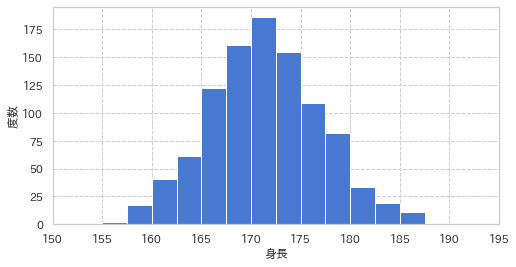

In [7]:
# コード1: pythonでヒストグラム描画
plt.figure(figsize=(8,4))
plt.hist(height_men, bins=np.arange(150, 195, 2.5),)
plt.xlim(150, 195)
plt.ylabel("度数")
plt.xlabel("身長")
plt.show()

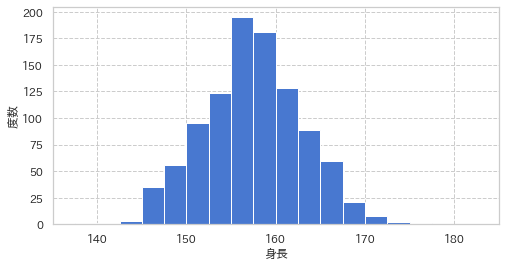

In [8]:
plt.figure(figsize=(8,4))
plt.hist(height_women, bins=np.arange(135, 185, 2.5),)
plt.xlim(135, 185)
plt.ylabel("度数")
plt.xlabel("身長")
plt.show()

* 図2 2つのデータセットのヒストグラム

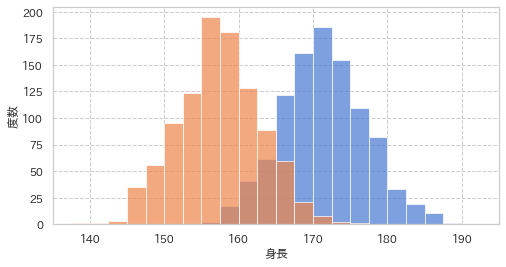

In [10]:
# コード2: pythonでヒストグラム描画
plt.figure(figsize=(8,4))
plt.hist(height_men, bins=np.arange(140, 200, 2.5), alpha=0.7, label="男性")
plt.hist(height_women, bins=np.arange(135, 180, 2.5), alpha=0.7, label="女性")
plt.xlim(135, 195)
plt.ylabel("度数")
plt.xlabel("身長")
plt.show()